In [1]:
%matplotlib inline
print(__doc__)

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


In [2]:
###############################################################################
#loading data set
X = np.load("chain_double.npy")
y = np.load("FES_double.npy")
print (X.shape, y.shape)

#preprocess X [1 0 1 0] to be [0.5 -0.5 0.5 -0.5]
X = X-0.5


(20002, 20) (20002,)


In [3]:
###############################################################################
# define Fit regression model
svr_rbf = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=.2)



In [4]:
###############################################################################
# define Fit regression model
#svr_lin = SVR(kernel='linear', C=100, gamma='auto')
#svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
# rbf works best for this system, change to other kernel to see how it works

#separate train data set and test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=3345, test_size=0.2)
################################################################################
# fitting the regression model
svr_rbf.fit(X_train,y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [5]:
loss_train = np.mean(abs(y_train - svr_rbf.predict(X_train))/y_train)
loss_test =  np.mean(abs(y_test - svr_rbf.predict(X_test))/y_test)


print ("Train Loss:", loss_train)
print ("Test Loss:",  loss_test)

Train Loss: 0.020656654720244878
Test Loss: 0.026768392576547333


Text(0, 0.5, 'Predicted Value (kT)')

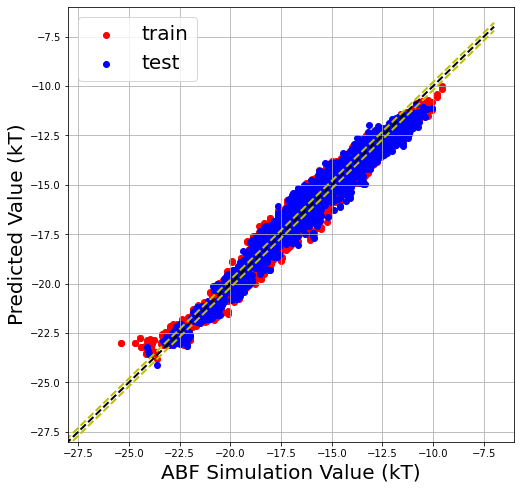

In [6]:
yline = np.arange(-30,-6)
#print (yline)
plt.figure(figsize=(8,8))

plt.scatter(-y_train, -svr_rbf.predict(X_train),c='red',label='train' )
plt.scatter(-y_test, -svr_rbf.predict(X_test), c='blue',label="test")

#plt.scatter([11.713681919345985], [11.713681919345985], c='orange', s= 300,label="test")
#plt.scatter(y[5001:5168], svr_rbf.predict(X[5001:5168]), c='y',label="test")
#plt.scatter(y, y_pred_lin, label="lin")
#plt.scatter(y, y_pred_poly, label="poly")
plt.plot(yline,yline,  '--k', lw=2)
plt.plot(yline,yline-0.2,  '--y', lw=2)
plt.plot(yline,yline+0.2,  '--y', lw=2)

plt.grid(True)
plt.legend(fontsize = 20)
plt.xlim(-28,-6)
plt.ylim(-28,-6)
plt.xlabel("ABF Simulation Value (kT)", size = 20)
plt.ylabel("Predicted Value (kT)", size = 20)

26
27


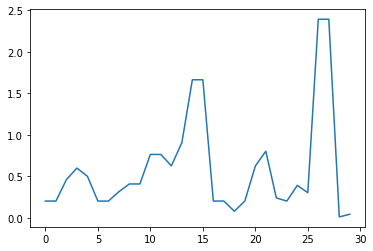

In [7]:
plt.plot(abs(y-svr_rbf.predict(X))[0:30])

error = abs(y-svr_rbf.predict(X))
for i in range(len(error)):
  if error[i] >= 2:
    print (i) 

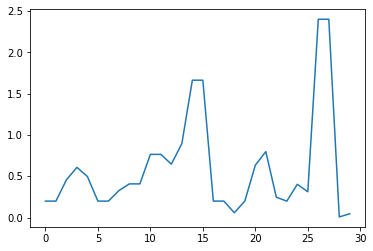

In [ ]:
plt.plot(error[0:30])

## Genetic Algorithm

In [ ]:
#Genetic Algorithm setting
DNA_SIZE = 20            # DNA length
POP_SIZE = 200          # population size
CROSS_RATE = 0.8         # mating probability (DNA crossover)
MUTATION_RATE = 0.003    # mutation probability
N_GENERATIONS = 3000
#X_BOUND = [0, 5]        # x upper and lower bounds
random_seed = 1

np.random.seed(random_seed)

In [ ]:
def F(pop):
  return svr_rbf.predict(pop-0.5)

In [ ]:
# find non-zero fitness for selection
def get_fitness(pred): 
	return pred


# convert binary DNA to decimal and normalize it to a range(0, 5)
def translateDNA(pop): return pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2**DNA_SIZE-1) * X_BOUND[1]


def select(pop, fitness):    # nature selection wrt pop's fitness
    idx = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True,
                           p=fitness/fitness.sum())
    return pop[idx]


def crossover(parent, pop):     # mating process (genes crossover)
    if np.random.rand() < CROSS_RATE:
        i_ = np.random.randint(0, POP_SIZE, size=1)                             # select another individual from pop
        cross_points = np.random.randint(0, 2, size=DNA_SIZE).astype(np.bool)   # choose crossover points
        parent[cross_points] = pop[i_, cross_points]                            # mating and produce one child
    return parent


def mutate(child):
    for point in range(DNA_SIZE):
        if np.random.rand() < MUTATION_RATE:
            child[point] = 1 if child[point] == 0 else 0
    return child

In [ ]:
pop = (X+0.5)[0:POP_SIZE]

print ("origin pop:", pop)


origin pop: [[1. 0. 1. ... 1. 0. 1.]
 [1. 0. 1. ... 1. 0. 1.]
 [0. 1. 0. ... 1. 0. 1.]
 ...
 [0. 1. 0. ... 1. 1. 1.]
 [0. 1. 1. ... 1. 1. 0.]
 [0. 1. 1. ... 1. 1. 0.]]


In [ ]:
###############################################################################
#start the genetic algorithm to search for the optimized polymer chain
for _ in range(N_GENERATIONS):

	fitness = get_fitness(F(pop))
 
	print(_," Most fitted DNA: ", pop[np.argmax(fitness), :],fitness[np.argmax(fitness)])
	pop = select(pop, fitness)
	pop_copy = pop.copy()
	for parent in pop:
		child = crossover(parent, pop_copy)
		child = mutate(child)
		parent[:] = child       # parent is replaced by its child

	#print ("newpop:", pop) # print the new pop
  #print ("newpop shape", np.shape(pop))

#plt.ioff(); plt.show()

0  Most fitted DNA:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 24.05901794999438
1  Most fitted DNA:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 24.05901794999438
2  Most fitted DNA:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 24.05901794999438
3  Most fitted DNA:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 24.05901794999438
4  Most fitted DNA:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.] 22.5650708450734
5  Most fitted DNA:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.] 22.5650708450734
6  Most fitted DNA:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.] 23.087412406642002
7  Most fitted DNA:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 24.0243728503971
8  Most fitted DNA:  [0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.] 20.61239978591751
9  Most fitted DNA:  [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.] 19.7786659

In [ ]:
#def F(pop): 
#	FES = []
#	for i in np.arange(0,len(pop)):
#		x=list(xarray)
#		x_copy = x.copy()
#		x.reverse()
#		if x_copy in Xlist:
#			index = Xlist.index(x_copy)
#			FES.append(y[index])
#		elif x in Xlist:
#			index = Xlist.index(x)
#			FES.append(y[index])
#		else:
#			print ("error")
#			fes = svr_rbf.predict(xarray.reshape(-1, 20))
#			print (fes[0].item())   
#			FES.append(fes[0].item())
#	return np.array(FES)

In [ ]:
################################################################################
# change random_state to get different train data and test data
# process on a series of train data
for i in np.arange(0,20):
  t = np.random.rand()*1000
  randseed = int(49*np.exp(t/300)+30*t*np.log(t)+pow(t,2))
  ###############################################################################
  #separate train data set and test data set
  X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=randseed, test_size=0.2)
  ################################################################################
  # define Fit regression model
  svr_rbf = SVR(kernel='rbf', C=10, gamma='auto', epsilon=.2)
  # fitting the regression model
  svr_rbf.fit(X_train,y_train)
  loss_train = np.mean(abs(y_train - svr_rbf.predict(X_train))/y_train)
  loss_test =  np.mean(abs(y_test - svr_rbf.predict(X_test))/y_test)
  print (i)
  print ("Train Loss:", loss_train)
  print ("Test Loss:",  loss_test)


0
Train Loss: 0.0338682707502422
Test Loss: 0.03681573434439542
1
Train Loss: 0.033804209652502026
Test Loss: 0.03721707577101252
2
Train Loss: 0.0337033992004948
Test Loss: 0.03746372074334795


KeyboardInterrupt: ignored